# Xứ lý các dữ liệu số của dữ liệu

## Khai báo thư viện

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Đọc dữ liệu

In [75]:
train = pd.read_csv('../../data/raw/train.csv')
test = pd.read_csv('../../data/raw/test.csv')

In [76]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Lọc dữ liệu

In [77]:
train = train.select_dtypes(include = 'number')
test = test.select_dtypes(include = 'number')

### SalePrice

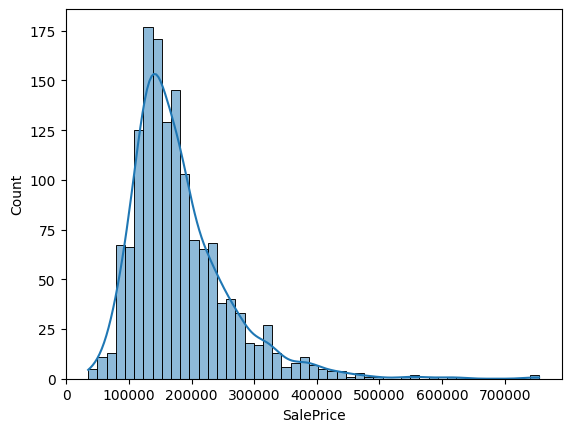

In [78]:
sns.histplot(train['SalePrice'], kde=True)
plt.show()

**Nhận xét**
+ Giá trị của SalePrice bị lệch => cần biến đổi bằng cách dùng biến đổi log

In [79]:
train['SalePrice'] = np.log1p(train['SalePrice'])

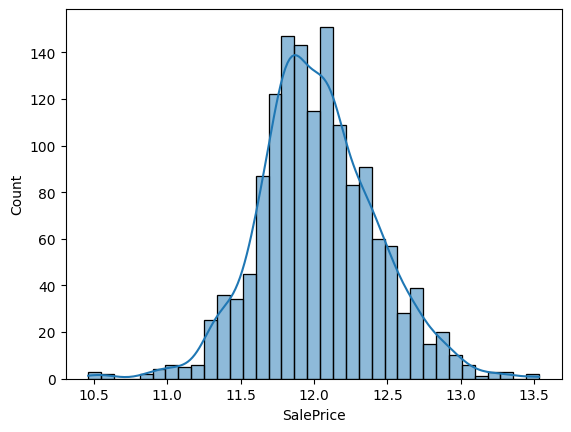

In [80]:
sns.histplot(train['SalePrice'], kde=True)
plt.show()

**Dữ liệu SalePrice đã cân bằng**

## Missing Value

### GarageYrBlt

Điền GarageYrBlt theo mean của YearBuilt của ngôi nhà để điền một cách chính xác hơn do năm xây Garage có liên hệ với năm xây nhà

In [81]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(
    train.groupby('YearBuilt')['GarageYrBlt'].transform('mean')
)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(
    test.groupby('YearBuilt')['GarageYrBlt'].transform('mean')
)

In [82]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(
    train['GarageYrBlt'].mean()
)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())

### LotFrontage

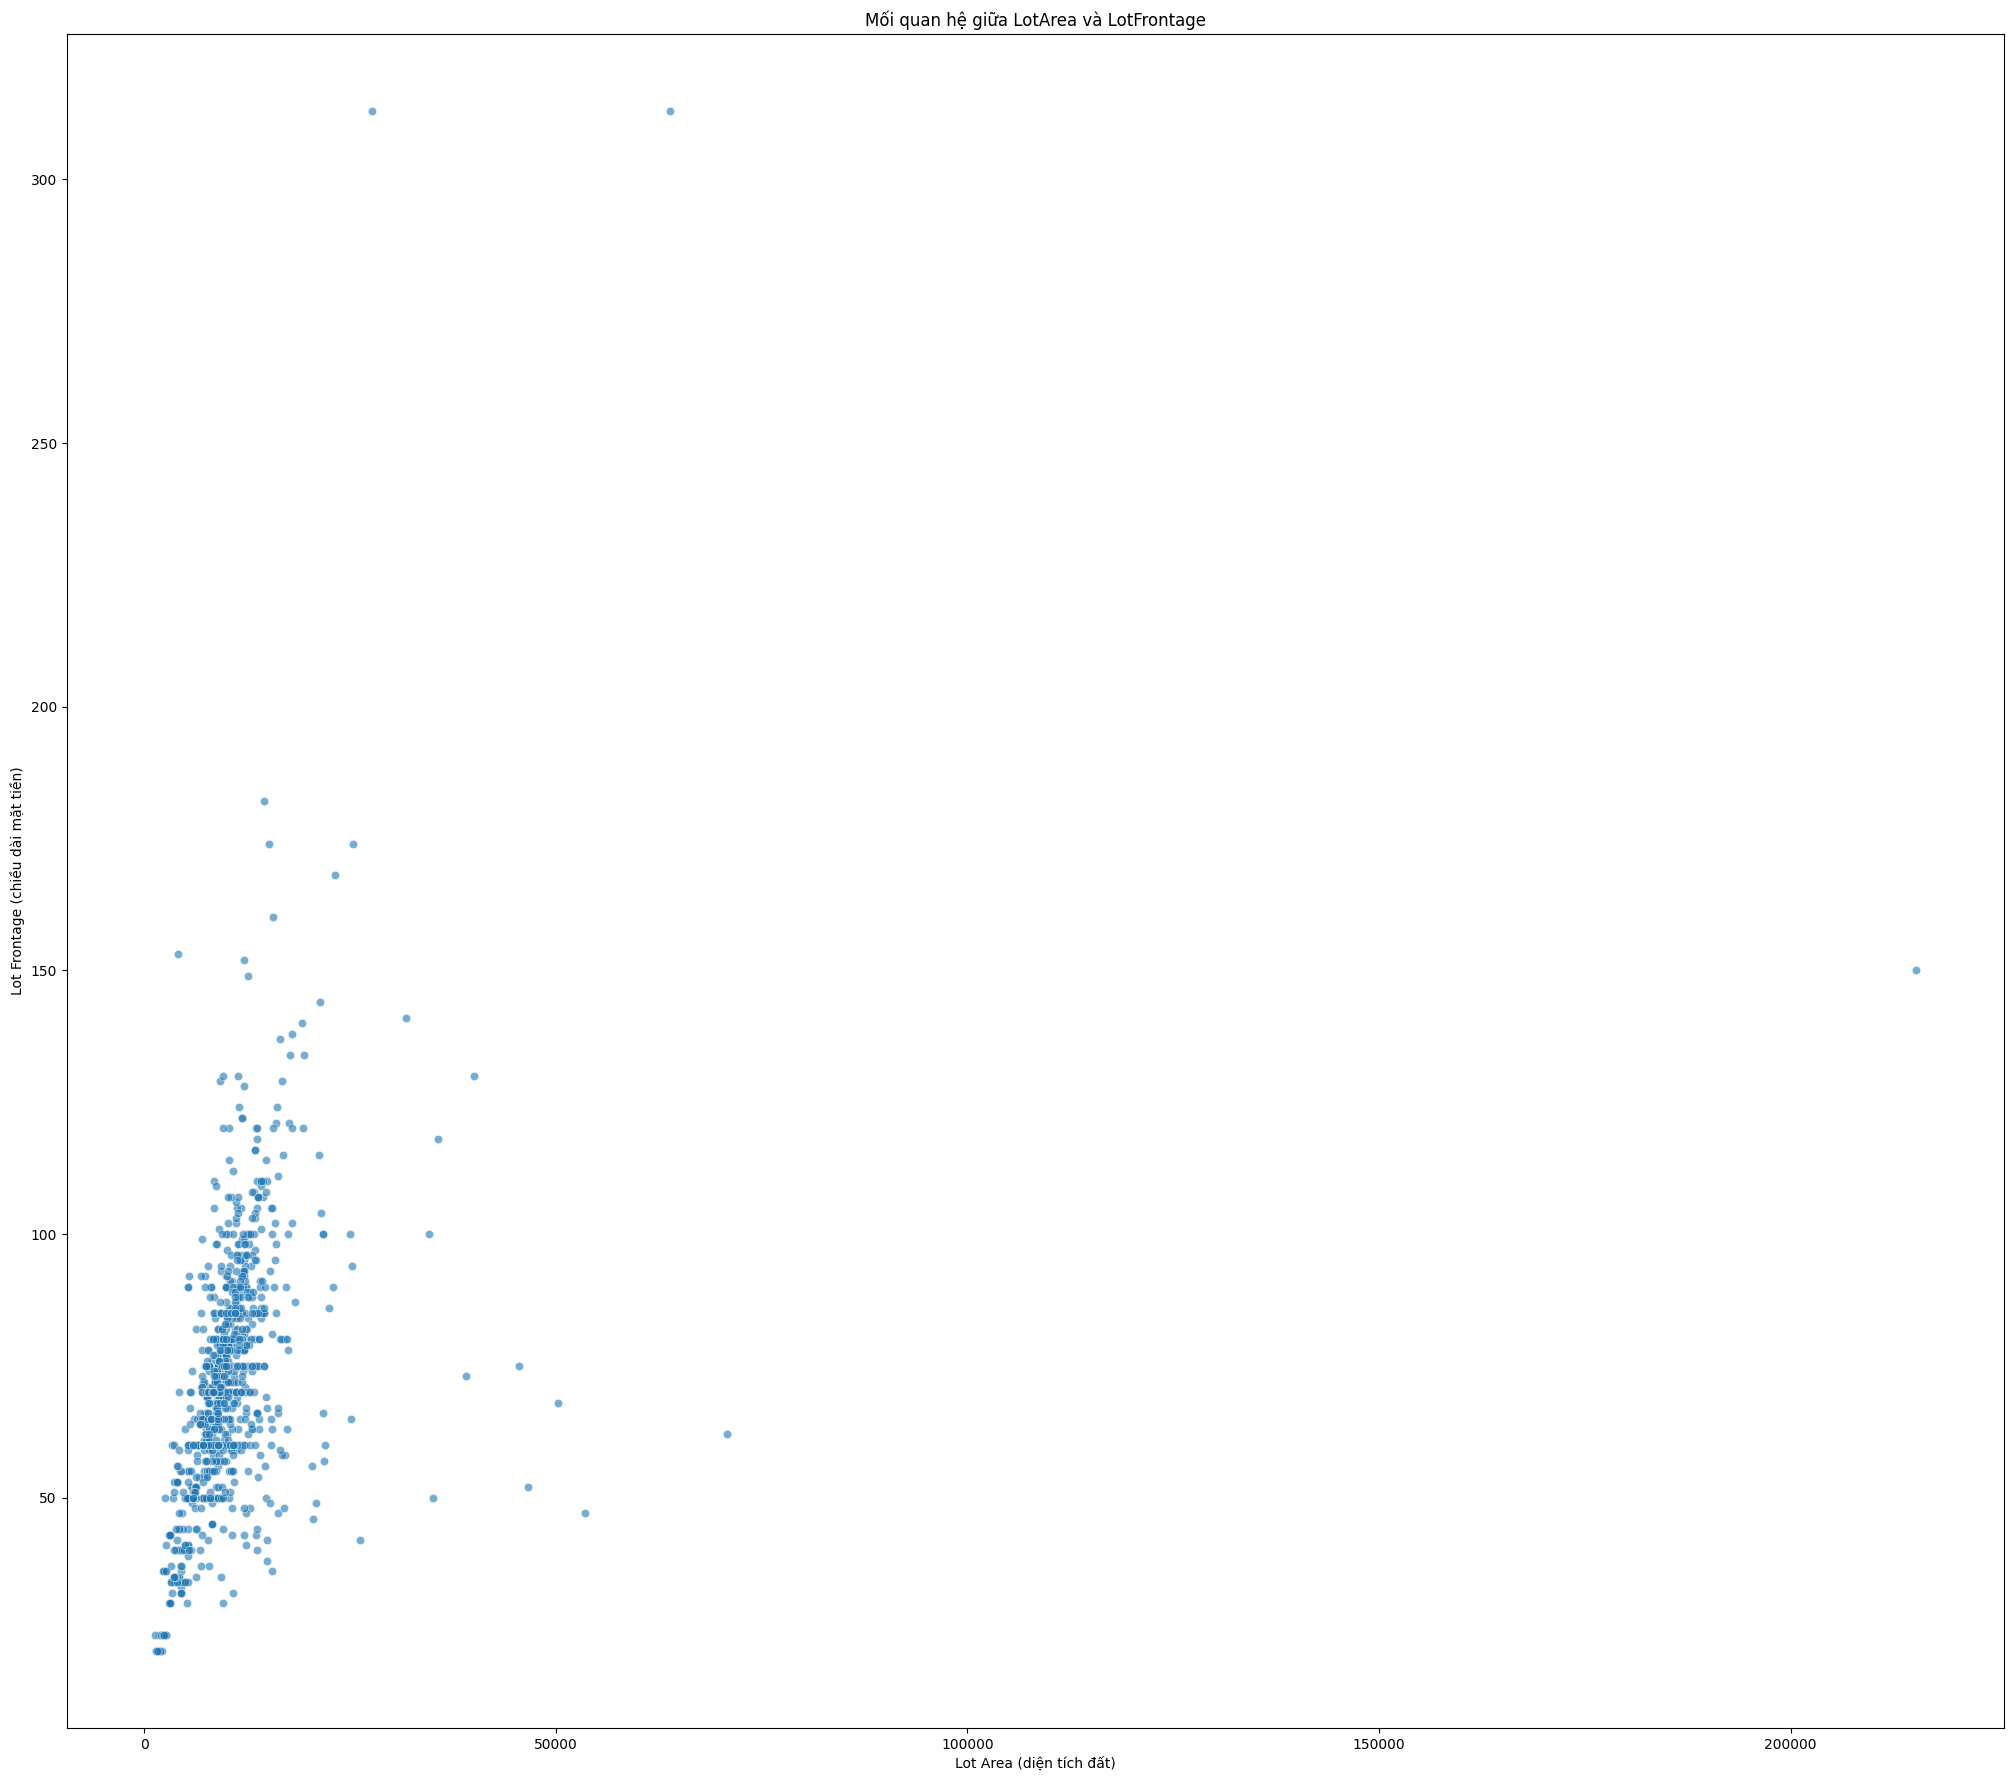

In [83]:
plt.figure(figsize=(25, 22))
sns.scatterplot(data=train, x='LotArea', y='LotFrontage', alpha=0.6)
plt.title('Mối quan hệ giữa LotArea và LotFrontage')
plt.xlabel('Lot Area (diện tích đất)')
plt.ylabel('Lot Frontage (chiều dài mặt tiền)')
plt.show()

**Nhận xét:** 
+ Ta có thể thấy LotArea và LotFontage có quan hệ tuyến tính với nhau (theo một đường thằng)
+ Từ đó ta có thể dùng mô hình Hồi quy tuyến tính để điền giá trị thiếu của LotFontage

In [84]:
train_df = train[train['LotFrontage'].notna()]
test_df = train[train['LotFrontage'].isna()]

features = ['LotArea', '1stFlrSF']

X_train = train_df[features]
y_train = train_df['LotFrontage']
X_test = test_df[features]

model = LinearRegression()
model.fit(X_train, y_train)

predicted = model.predict(X_test)

train.loc[train['LotFrontage'].isna(), 'LotFrontage'] = predicted


In [85]:
train_df = test[test['LotFrontage'].notna()]
test_df = test[test['LotFrontage'].isna()]

features = ['LotArea', '1stFlrSF']

X_train = train_df[features]
y_train = train_df['LotFrontage']
X_test = test_df[features]

model = LinearRegression()
model.fit(X_train, y_train)

predicted = model.predict(X_test)

test.loc[test['LotFrontage'].isna(), 'LotFrontage'] = predicted

### MasVnrArea

MasVnrArea có số lượng giá trị thiếu khá thấp nên ta có thể điền đơn giản bằng cách điền mean

In [86]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())

In [87]:
train.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF

Các cột BsmtFinSF1, BsmtFinSF2, BsmtUnfSF missing khá ít nên ta có thể điền đơn giản bằng mean sao đó ta sẽ tìm được biến TotalBsmtSF

In [88]:
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
mask = test['TotalBsmtSF'].isna()
test.loc[mask, 'TotalBsmtSF'] = (
    test.loc[mask, 'BsmtUnfSF'] + 
    test.loc[mask, 'BsmtFinSF2'] + 
    test.loc[mask, 'BsmtFinSF1']
)

### GarageArea và GarageCars

Hai biến này chỉ missing 1 giá trị thì ta cũng sẽ điền bằng mean

In [89]:
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())

### BsmtFullBath và BsmtHalfBath

In [90]:
# Bước 1: Kiểm tra - xác định các dòng bị thiếu trong BsmtFullBath hoặc BsmtHalfBath
missing_bath_mask = test['BsmtFullBath'].isna() | test['BsmtHalfBath'].isna()

# Bước 2: Điền 0 nếu không có tầng hầm
# Tìm các dòng có TotalBsmtSF = 0 hoặc bị thiếu
no_basement_mask = (test['TotalBsmtSF'] == 0) | (test['TotalBsmtSF'].isna())

# Kết hợp điều kiện: bị thiếu bath VÀ không có tầng hầm
fill_zero_mask = missing_bath_mask & no_basement_mask

# Điền 0 cho các dòng thỏa mãn điều kiện
test.loc[fill_zero_mask, 'BsmtFullBath'] = test.loc[fill_zero_mask, 'BsmtFullBath'].fillna(0)
test.loc[fill_zero_mask, 'BsmtHalfBath'] = test.loc[fill_zero_mask, 'BsmtHalfBath'].fillna(0)

# Bước 3: Dự phòng - điền trung vị cho các dòng còn lại bị thiếu
# Các dòng còn lại bị thiếu bath NHƯNG có tầng hầm
remaining_missing_mask = missing_bath_mask & ~no_basement_mask

# Tính trung vị
bsmt_full_median = test['BsmtFullBath'].median()
bsmt_half_median = test['BsmtHalfBath'].median()

# Điền trung vị
test.loc[remaining_missing_mask & test['BsmtFullBath'].isna(), 'BsmtFullBath'] = bsmt_full_median
test.loc[remaining_missing_mask & test['BsmtHalfBath'].isna(), 'BsmtHalfBath'] = bsmt_half_median

### Sau khi xử lý

In [91]:
train.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [92]:
test.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

## Huấn luyện mô hình

In [93]:
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

In [94]:
import xgboost as xgb

# Khởi tạo model
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Huấn luyện
model.fit(X, y)
predictions = np.expm1(model.predict(test))
results = pd.DataFrame({
    "Id": test['Id'],
    "SalePrice": predictions
})
results.to_csv('final_submission.csv', index=False)